# Housing Price Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df = pd.read_csv('/home/gonde94/Downloads/archive/data.csv')

In [15]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


## EDA 

<AxesSubplot:xlabel='price', ylabel='Count'>

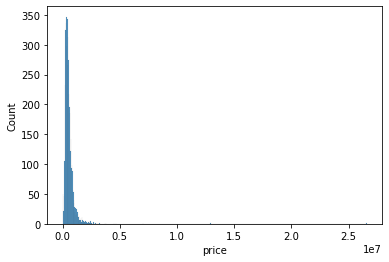

In [4]:
sns.histplot(data=df,x='price')

###  Get rid of the outliers. Set an upper limit of 1,000,000 dollars for house prices.

In [33]:
index_names = df[df['price'] >= 1000000].index

df.drop(index_names, inplace=True)

<AxesSubplot:xlabel='price', ylabel='Count'>

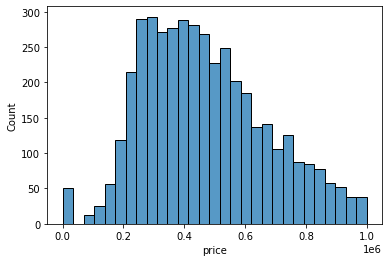

In [34]:
sns.histplot(data=df,x='price')

### Some houses have a price of 0. Remove these.

In [35]:
pricezero = df[df['price'] == 0].index

df.drop(pricezero, inplace=True)

<AxesSubplot:xlabel='price', ylabel='Count'>

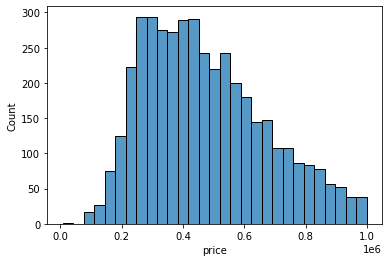

In [36]:
sns.histplot(data=df,x='price')

In [218]:
df.shape

(4207, 15)

In [7]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

## For now, just explore base models with only numerical variables

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4256 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4256 non-null   object 
 1   price          4256 non-null   float64
 2   bedrooms       4256 non-null   float64
 3   bathrooms      4256 non-null   float64
 4   sqft_living    4256 non-null   int64  
 5   sqft_lot       4256 non-null   int64  
 6   floors         4256 non-null   float64
 7   waterfront     4256 non-null   int64  
 8   view           4256 non-null   int64  
 9   condition      4256 non-null   int64  
 10  sqft_above     4256 non-null   int64  
 11  sqft_basement  4256 non-null   int64  
 12  yr_built       4256 non-null   int64  
 13  yr_renovated   4256 non-null   int64  
 14  street         4256 non-null   object 
 15  city           4256 non-null   object 
 16  statezip       4256 non-null   object 
 17  country        4256 non-null   object 
dtypes: float

In [20]:
for c in df.columns:
    if df[c].dtypes == 'object':
        df.drop(c, axis=1, inplace=True)

In [37]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated'],
      dtype='object')

## Create a baseline linear regression model

### And only using numerical variables for now

In [38]:
y = df['price']
X = df.drop('price',axis=1)

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [43]:
from sklearn.linear_model import LinearRegression

In [77]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [78]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [79]:
predictions = model.predict(X_test)

In [80]:
df['price'].mean() #average house price

473020.1794889769

In [81]:
mean_absolute_error(y_test, predictions) #off by $120,000! 25% off average house price

119707.86572974574

In [82]:
np.sqrt(mean_squared_error(y_test, predictions))

147358.24626488602

In [83]:
test_residuals = y_test - predictions

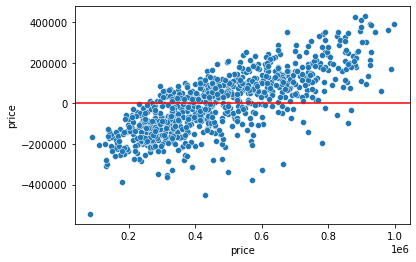

In [84]:
sns.scatterplot(x=y_test, y=test_residuals)
plt.axhline(y=0,color='red')

In [85]:
import scipy as sp

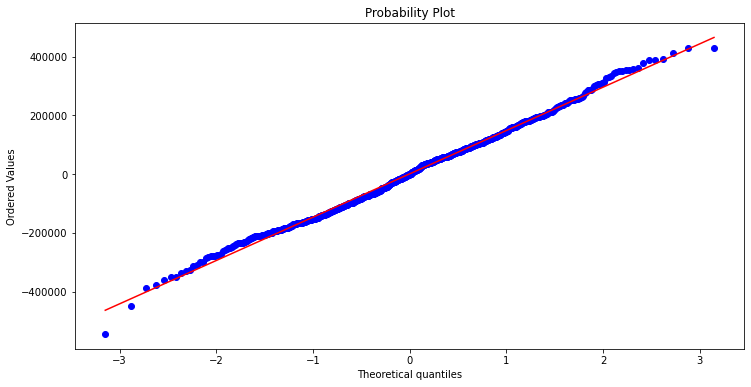

In [86]:
fig, ax = plt.subplots(figsize=(12,6))
r = sp.stats.probplot(test_residuals,plot=ax)

## Find best number of estimators for Random Forest

In [50]:
from sklearn.ensemble import RandomForestRegressor

In [51]:
mae = []

for i in range(1,201):
    rfc = RandomForestRegressor(n_estimators=i)
    rfc.fit(X_train, y_train)
    preds = rfc.predict(X_test)
    n_missed = mean_absolute_error(y_test, preds)
    
    mae.append(n_missed)

Text(0, 0.5, 'Mean Absolute Error')

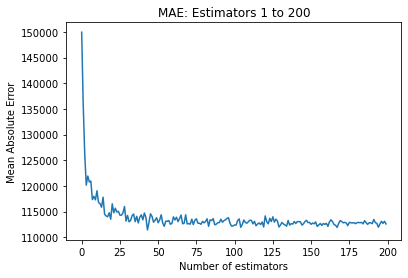

In [52]:
plt.plot(mae)
plt.title('MAE: Estimators 1 to 200')
plt.xlabel('Number of estimators')
plt.ylabel('Mean Absolute Error')

In [53]:
min(mae) #$8000 better than linear model

111414.94284819311

In [54]:
min_val = min(mae)
min_val_index = [i for i in range(len(mae)) if mae[i]==min_val]
min_val_index 
#index position 43, so 44 estimators gives best performance

[43]

In [55]:
rfc = RandomForestRegressor(n_estimators=44)
rfc.fit(X_train, y_train)

RandomForestRegressor(n_estimators=44)

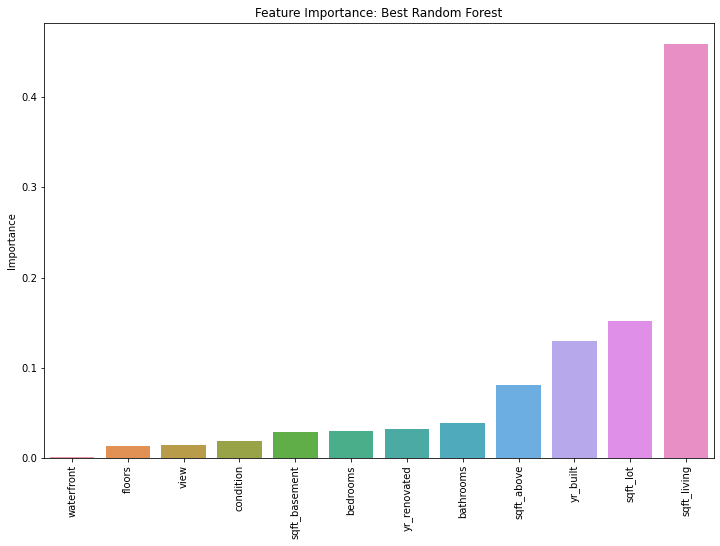

In [56]:
feat_import = rfc.feature_importances_
imp_feat = pd.DataFrame(index=X_train.columns,data=feat_import,columns=['Importance'])

imp_feat = imp_feat.sort_values('Importance')
plt.figure(figsize=(12,8))
plt.title('Feature Importance: Best Random Forest')
sns.barplot(data=imp_feat,x=imp_feat.index,y='Importance')
plt.xticks(rotation=90);

## Can you train multiple models in one go?

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

In [62]:
models = []
models.append(('LR', LinearRegression()))
models.append(('CART', RandomForestRegressor()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('SVM', SVR()))
models.append(('XGB', xgb.XGBRegressor()))

In [66]:
results = []
names = []

for name, model in models:
    kfold = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_absolute_error')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(),cv_results.std())

[Text(1, 0, 'LR'),
 Text(2, 0, 'CART'),
 Text(3, 0, 'KNN'),
 Text(4, 0, 'SVM'),
 Text(5, 0, 'XGB')]

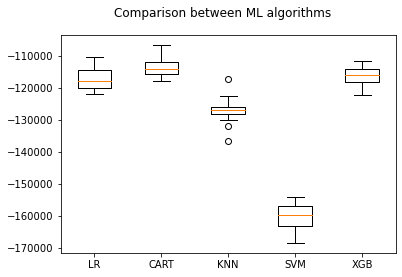

In [67]:
fig = plt.figure()
fig.suptitle('Comparison between ML algorithms')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)

In [69]:
MLA = [LinearRegression(),
       RandomForestRegressor(),
       KNeighborsRegressor(),
       SVR(),
       xgb.XGBRegressor()
]

In [70]:
MLA_cols = []
MLA_compare = pd.DataFrame(columns = MLA_cols)

row_index = 1
for alg in MLA:
    predicted = alg.fit(X_train, y_train).predict(X_test)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA used'] = MLA_name
    MLA_compare.loc[row_index, 'MAE'] = mean_absolute_error(y_test, predicted)
    row_index += 1

In [71]:
MLA_compare.sort_values(by=['MAE'])

,MLA used,MAE
2,RandomForestRegressor,113306.766211
5,XGBRegressor,114263.604584
1,LinearRegression,119707.865730
3,KNeighborsRegressor,130266.191509
4,SVR,160242.177008


## Try stacking models (still without categorical variables)

In [22]:
from sklearn.ensemble import StackingRegressor

In [25]:
def get_stacking():
    #define base models
    level0 = list()
    level0.append(('KNN', KNeighborsRegressor()))
    level0.append(('CART', RandomForestRegressor()))
    level0.append(('XGB', xgb.XGBRegressor()))
    #define meta learner model
    level1 = LinearRegression()
    #define the stacking ensemble
    model = StackingRegressor(estimators=level0,final_estimator=level1, cv=5)
    return model

In [40]:
def get_models():
    models = {}
    models['KNN'] = KNeighborsRegressor()
    models['CART'] = RandomForestRegressor()
    models['XGB'] = xgb.XGBRegressor()
    models['Stack'] = get_stacking()
    return models

In [38]:
def evaluate_model(model, X, y):
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=42)
    scores = model_selection.cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv)
    return scores

In [41]:
models = get_models()

In [47]:
results = []
names = []

for name, model in models.items():
    scores = evaluate_model(model, X_train, y_train)
    results.append(scores)
    names.append(name)
    msg = "%s: %f (%f)" % (name, scores.mean(),scores.std())

[Text(1, 0, 'KNN'), Text(2, 0, 'CART'), Text(3, 0, 'XGB'), Text(4, 0, 'Stack')]

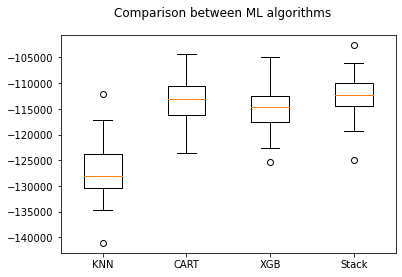

In [48]:
fig = plt.figure()
fig.suptitle('Comparison between ML algorithms')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)

In [44]:
level0 = []
level0.append(('KNN', KNeighborsRegressor()))
level0.append(('CART', RandomForestRegressor()))
level0.append(('XGB', xgb.XGBRegressor()))

level1 = LinearRegression()

stack = StackingRegressor(estimators=level0,final_estimator=level1,cv=5)
stack.fit(X_train, y_train)

StackingRegressor(cv=5,
                  estimators=[('KNN', KNeighborsRegressor()),
                              ('CART', RandomForestRegressor()),
                              ('XGB',
                               XGBRegressor(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            enable_categorical=False,
                                            gamma=None, gpu_id=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None,
                                            max_delta_step=None, max_depth=None,
                                            min_child_weight=None, missing=nan,
                              

In [45]:
pred = stack.predict(X_train)

In [46]:
mean_absolute_error(pred, y_train) #a big improvement, 40% improvement on base model, only 10% off average price

52508.69448569604